In [1]:
import pandas as pd
import numpy as np
import mlxtend
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import (apriori, association_rules)
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel('cycle_store.xls')

In [3]:
def trans_matrix(df):
    df = df.set_index(df.columns[0]).iloc[:, 0]
    trids = np.unique(df.index)
    items = np.unique(df)
    df = [
        list(df[[t]]) for t in trids
    ]
    ohe = OnehotTransactions()
    ohe.fit(df)
    df = ohe.transform(df)
    return pd.DataFrame(df, index=trids, columns=ohe.columns_)
    

In [4]:
df = trans_matrix(df)
df.head()

,Велокамера Mountain,Велокамера Road,Велокамера Touring,Велокрыло Mountain,Велосипед Mountain-200,Велосипед Mountain-400-W,Велосипед Mountain-500,Велосипед Road-250,Велосипед Road-350-W,Велосипед Road-550-W,...,Тенниска фирменная,Фляга,Шапочка велосипедная,Шина HL Mountain,Шина HL Road,Шина LL Mountain,Шина ML Mountain,Шина ML Road,Шина Road,Шина Touring
SO51184,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
SO51188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SO51200,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SO51205,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
SO51206,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [5]:
EPS = .035
fqits = apriori(df,
                min_support=EPS,
                use_colnames=True
        ).sort_values('support', ascending=False)
fqits

,support,itemsets
9,0.269438,[Велосипед Sport-100]
19,0.191687,[Фляга]
0,0.142787,[Велокамера Mountain]
16,0.140831,[Пластыри для велокамеры]
4,0.108068,[Велосипед Mountain-200]
1,0.101711,[Велокамера Road]
13,0.097800,[Держатель фляги Mountain]
20,0.097311,[Шапочка велосипедная]
3,0.095355,[Велокрыло Mountain]
34,0.081663,"[Держатель фляги Mountain, Фляга]"


In [6]:
arules = association_rules(fqits, min_threshold=EPS)
arules

,antecedants,consequents,support,confidence,lift
0,(Фляга),(Держатель фляги Mountain),0.191687,0.426020,4.356059
1,(Держатель фляги Mountain),(Фляга),0.097800,0.835000,4.356059
2,(Фляга),(Держатель фляги Road),0.191687,0.334184,4.496090
3,(Держатель фляги Road),(Фляга),0.074328,0.861842,4.496090
4,(Велосипед Sport-100),(Велокамера Mountain),0.269438,0.237750,1.665061
5,(Велокамера Mountain),(Велосипед Sport-100),0.142787,0.448630,1.665061
6,(Шина HL Mountain),(Велокамера Mountain),0.065037,0.721805,5.055104
7,(Велокамера Mountain),(Шина HL Mountain),0.142787,0.328767,5.055104
8,(Фляга),(Велосипед Sport-100),0.191687,0.232143,0.861583
9,(Велосипед Sport-100),(Фляга),0.269438,0.165154,0.861583


In [7]:
import graphviz
import networkx as nx
from networkx.algorithms import bipartite

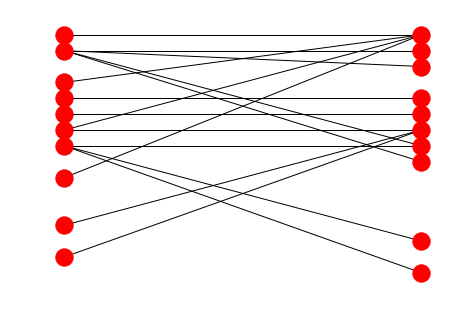

In [9]:
G = nx.Graph()
pos = dict()
for i in arules.index:
    src, dst, conf, supp, lift = arules.loc[i, :]
    src, dst = list(src)[0], list(dst)[0]
    src, dst = 'IF ' + src, 'THEN ' + dst
    pos[src], pos[dst] = (1, i), (2, i)
    G.add_node(src, weight=supp, bipartite=0)
    G.add_node(dst, weight=supp, bipartite=1)
    G.add_edge(src, dst, weight=conf)
nx.draw(G, pos=pos)